# Lab 3: ANOVA

In [2]:
import pandas as pd
from plotnine import ggplot, aes, stat_qq, stat_qq_line, geom_boxplot, coord_flip, geom_vline, geom_hline, geom_histogram, facet_grid
import statsmodels.stats.multicomp as mc
import scipy

## Question Set 1
Use the garlic dataset to perform an ANOVA. This dataset has information on the weight of garlic bulbs (bulbwt) for 32 different garlic plants. Each garlic plant was initially treated with 1 of 4 different types of fertilizers. The purpose of the experiment is to determine whether or not there is any difference in the resulting bulb weight when a garlic plant is treated with a different fertilizer.

In [2]:
garlic = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/garlic.csv")

### Question 1a
Create a qq-plot for the overall bulbwt variable. Which is the correct plot?

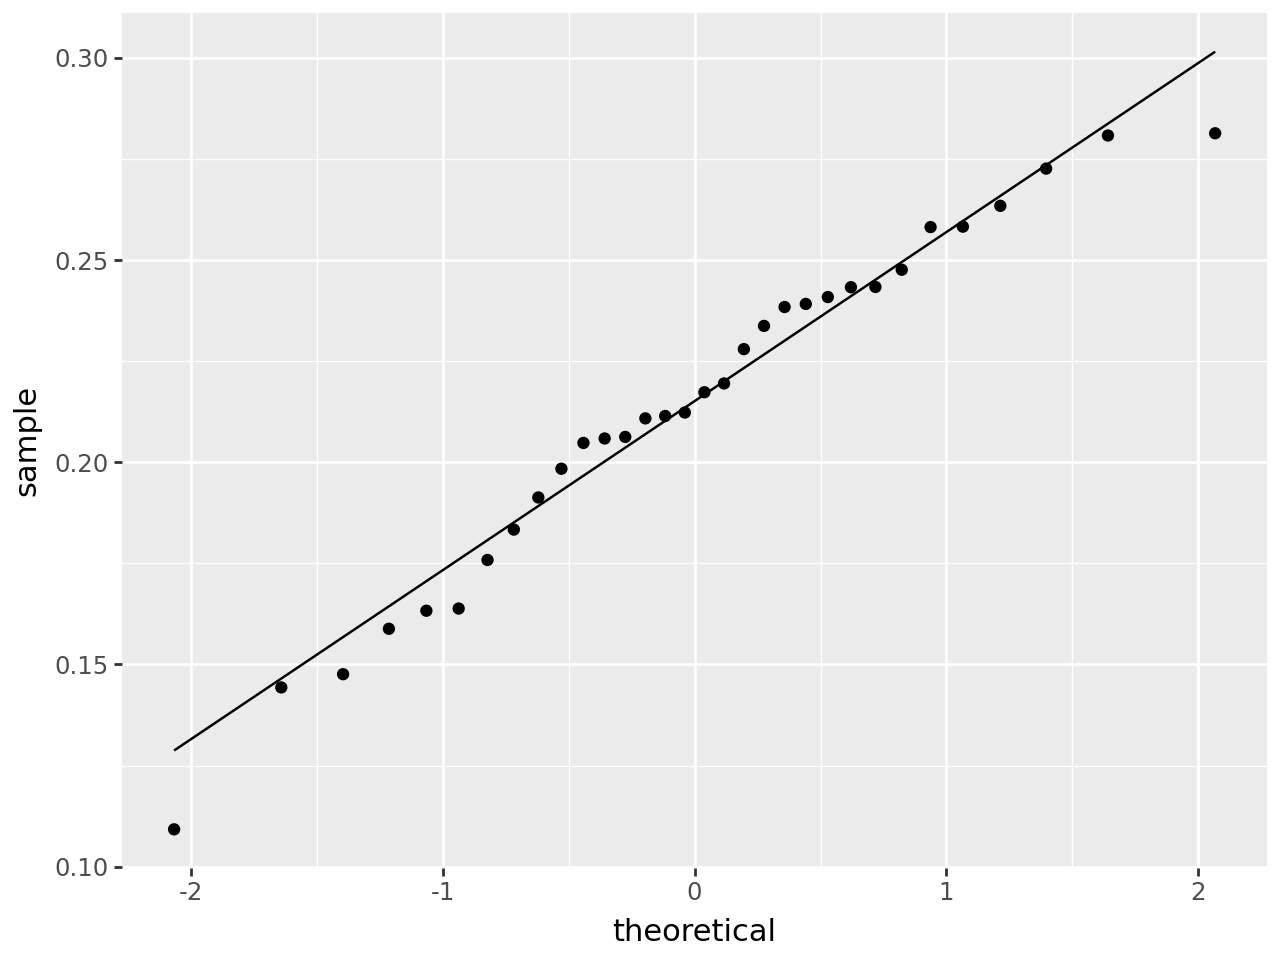

In [3]:

garlic_qq = (ggplot(garlic, aes(sample = 'BulbWt')) +
            stat_qq() +
            stat_qq_line())

garlic_qq.show()

### Question 1b
Is the BulbWt data normally distributed?

In [5]:
stat, p = scipy.stats.shapiro(garlic['BulbWt'])
AD_garlic = scipy.stats.anderson(garlic['BulbWt'])
print(f"The test statistic is {stat} and the p-value is {p}")
print(f"The AD test statistic is {AD_garlic.statistic}. The critical values are {AD_garlic.critical_values}. The significance level is {AD_garlic.significance_level}")

The test statistic is 0.9700108715660962 and the p-value is 0.49969810928053876
The AD test statistic is 0.2942622064692273. The critical values are [0.523 0.596 0.715 0.834 0.992]. The significance level is [15.  10.   5.   2.5  1. ]


Answer: Yes

### Question 1c
Is the normality assumption based on parts a and b enough to continue with ANOVA?

Answer: No, each category must be evaluated for normality

### Question 1d 
Create qq-plots for each group. Is the data normally distributed? (hint: using +facet_grid()  can produce multiple plots at once for different groups)

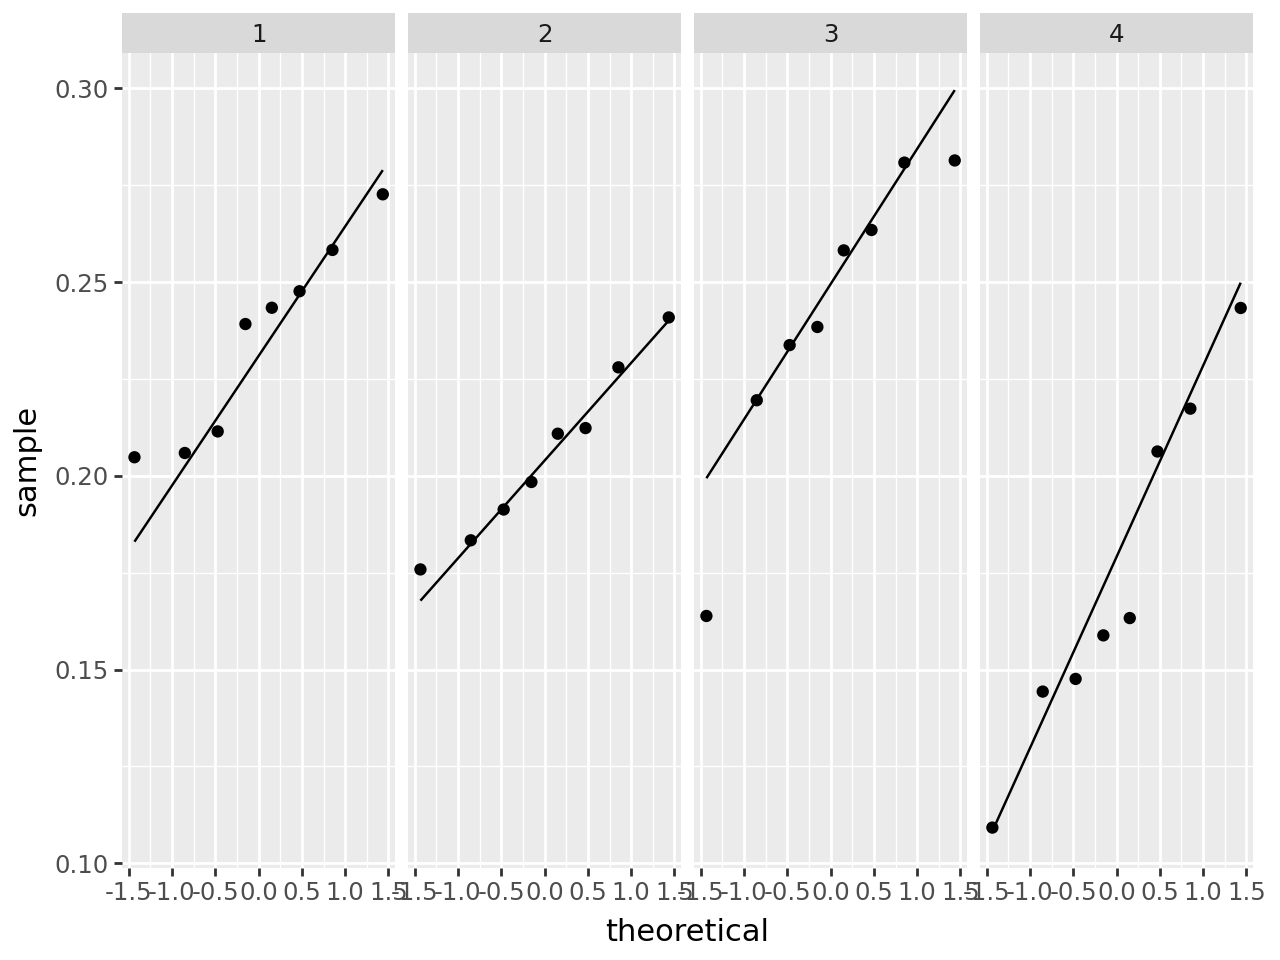

In [6]:
garlic_qq_fertilizer = (ggplot(garlic, aes(sample = 'BulbWt')) +
            facet_grid(cols='Fertilizer') +
            stat_qq() +
            stat_qq_line())

garlic_qq_fertilizer.show()

In [8]:
garlic_1 = garlic[garlic["Fertilizer"] == 1]
garlic_2 = garlic[garlic["Fertilizer"] == 2]
garlic_3 = garlic[garlic["Fertilizer"] == 3]
garlic_4 = garlic[garlic["Fertilizer"] == 4]

stat1, p1 = scipy.stats.shapiro(garlic_1)
stat2, p2 = scipy.stats.shapiro(garlic_2)
stat3, p3 = scipy.stats.shapiro(garlic_3)
stat4, p4 = scipy.stats.shapiro(garlic_4)

print(f"Fertilizer 1: {stat1:.3f} | {p1:.3f}")
print(f"Fertilizer 2: {stat2:.3f} | {p2:.3f}")
print(f"Fertilizer 3: {stat3:.3f} | {p3:.3f}")
print(f"Fertilizer 4: {stat4:.3f} | {p4:.3f}")

Fertilizer 1: 0.614 | 0.000
Fertilizer 2: 0.609 | 0.000
Fertilizer 3: 0.608 | 0.000
Fertilizer 4: 0.607 | 0.000


Answer: Yes?

### Question 1e
Perform Levene test to check the assumption of equal variance (homoscedasticity). What is your p-value? (round to 4 decimal places)

In [10]:
stat, p = scipy.stats.levene(garlic_1['BulbWt'], garlic_2['BulbWt'], garlic_3['BulbWt'], garlic_4['BulbWt'])

print(f"The test statistic is {stat:.4f}. The p-value is {p:.4f}")

The test statistic is 0.9663. The p-value is 0.4224


### Question 1f
Do the groups satisfy the assumption of equal variance (homoscedasticity)?

Answer: Yes

### Question 1g
If you were to test each type of fertilizer were different from each other type of fertilizer (pairwise), how many different hypothesis tests would there be? (give a numeric answer).

Answer: 4 choose 2 = 6

### Question 1h
Which fertilizers are statistically different from each other?

In [17]:
garlic_anova = mc.MultiComparison(data = garlic['BulbWt'], groups = garlic['Fertilizer']).tukeyhsd(0.05)

print(garlic_anova.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.0303 0.3021 -0.0766  0.0161  False
     1      3    0.007 0.9758 -0.0394  0.0534  False
     1      4  -0.0616 0.0058  -0.108 -0.0153   True
     2      3   0.0373  0.149 -0.0091  0.0837  False
     2      4  -0.0313 0.2738 -0.0777   0.015  False
     3      4  -0.0686  0.002  -0.115 -0.0223   True
----------------------------------------------------


Answer: Fertilizer 4 is significantly different from both 1 and 3

## Question Set 2

The Bottle dataset contains observations from a factory that is producing plastic water bottles along 3 different assembly lines. The number of units produced by each assembly line are given for a number of days. The manufacturer wants to know if the assembly lines are producing the same number of bottles. He suspects that 2 of his lines are significantly better than the third, but he has trouble demonstrating this due to variability in production. We will use this dataset to determine if we can answer his question with the tools we have now.

In [3]:
bottles = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/bottle.csv")

### Question 2a 
Is the data normally distributed?

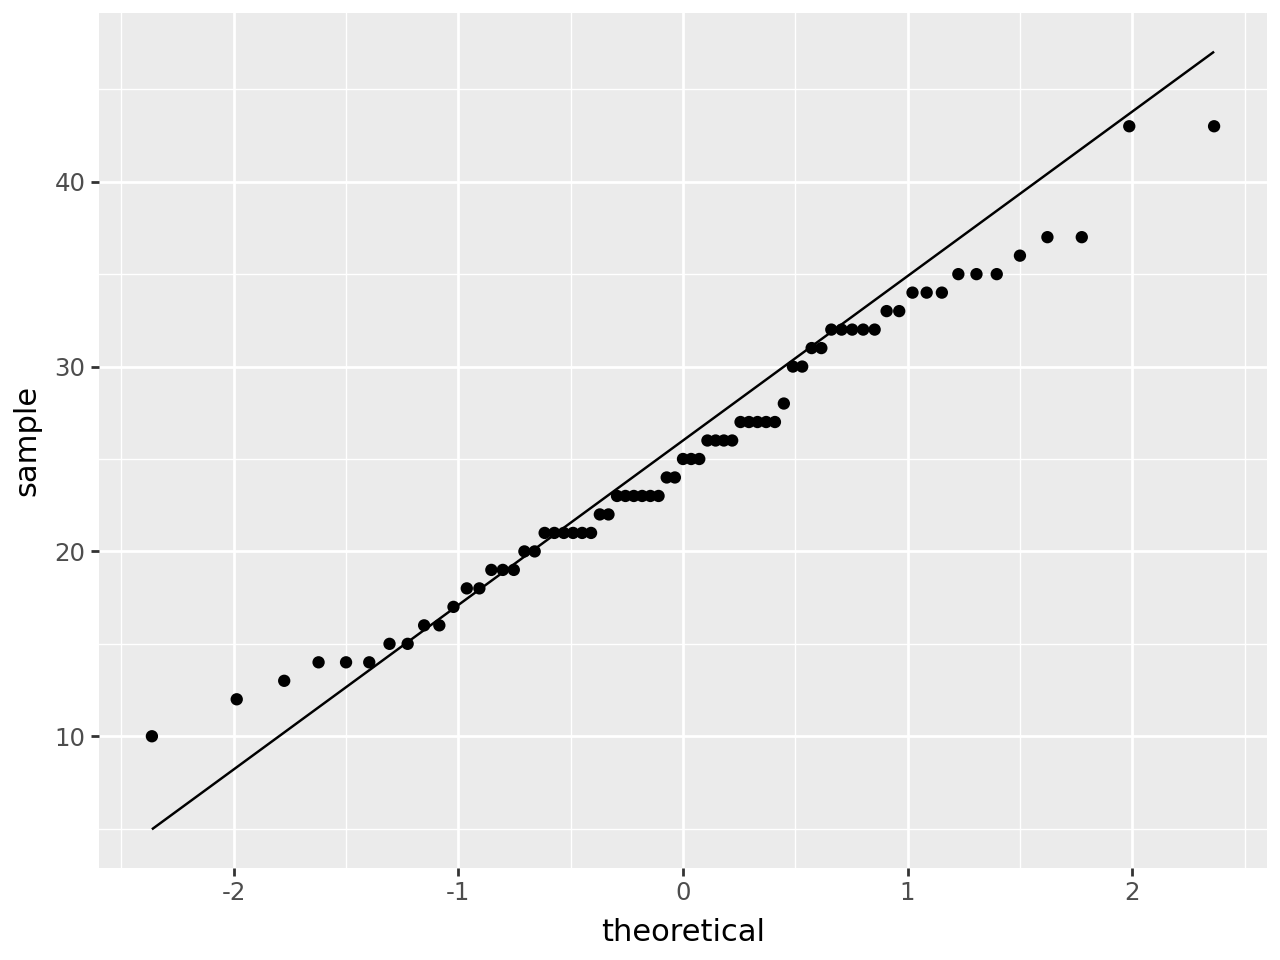

In [5]:
bottles_qq = (ggplot(bottles, aes(sample = 'Units')) +
            stat_qq() +
            stat_qq_line())

bottles_qq.show()

In [21]:
stat, p = scipy.stats.shapiro(bottles['Units'])
AD_bottles = scipy.stats.anderson(bottles['Units'])
print(f"The test statistic is {stat:.4f} and the p-value is {p:.4f}")
print(f"The AD test statistic is {AD_bottles.statistic:.4f}. The critical values are {AD_bottles.critical_values}. The significance level is {AD_bottles.significance_level}")

The test statistic is 0.9815 and the p-value is 0.3998
The AD test statistic is 0.3968. The critical values are [0.547 0.623 0.748 0.872 1.037]. The significance level is [15.  10.   5.   2.5  1. ]


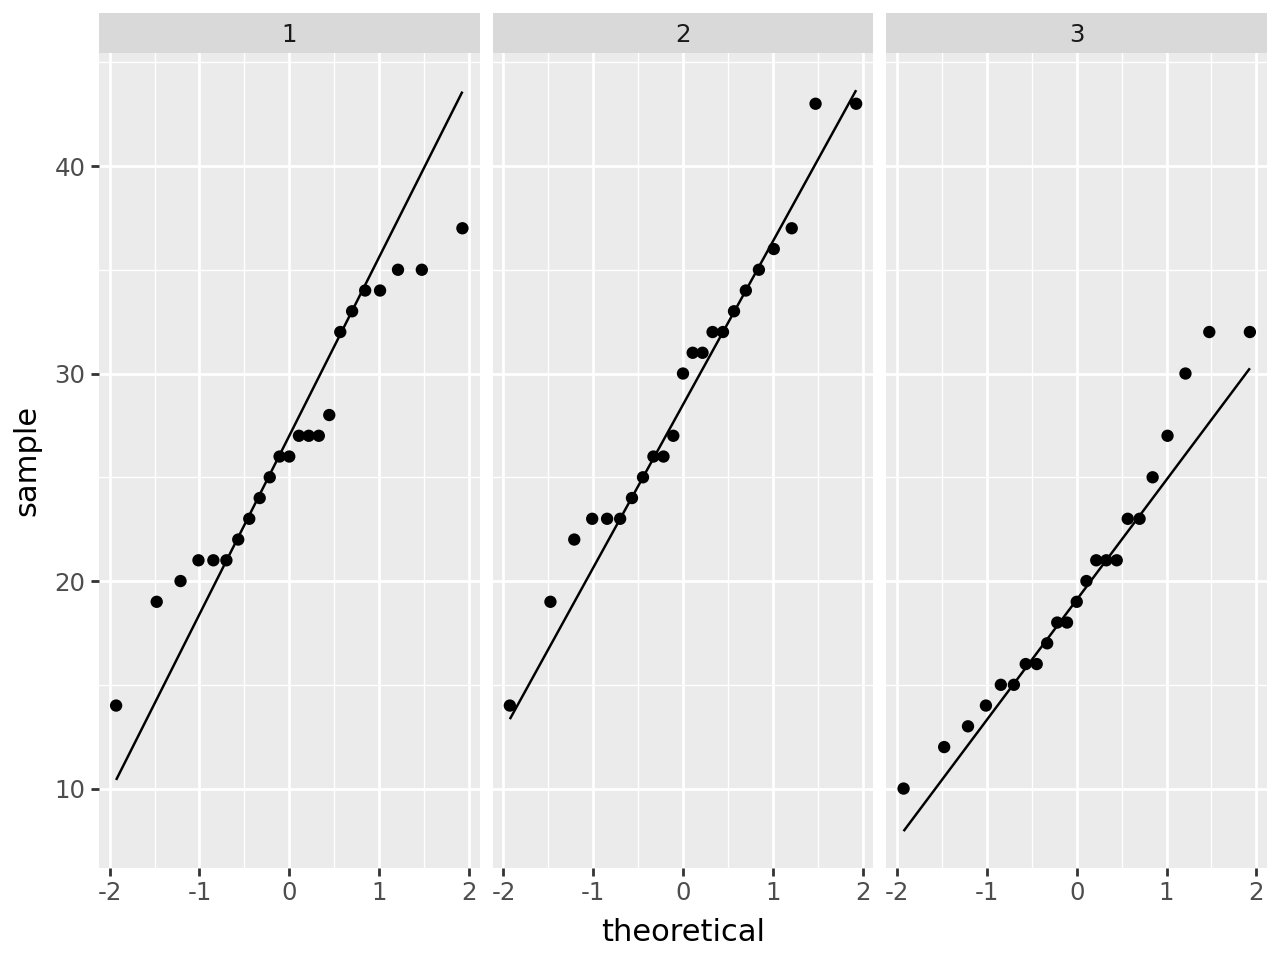

In [25]:
bottles_qq_line = (ggplot(bottles, aes(sample = 'Units')) +
            facet_grid(cols='Line') +
            stat_qq() +
            stat_qq_line())

bottles_qq_line.show()

In [24]:
bottles_1 = bottles[bottles['Line'] == 1]
bottles_2 = bottles[bottles['Line'] == 2]
bottles_3 = bottles[bottles['Line'] == 3]

In [26]:
stat_b_1, p_b_1 = scipy.stats.shapiro(bottles_1['Units'])
stat_b_2, p_b_2 = scipy.stats.shapiro(bottles_2['Units'])
stat_b_3, p_b_3 = scipy.stats.shapiro(bottles_3['Units'])

print(f"For Line 1: {stat_b_1:.4f} | {p_b_1:.4f}")
print(f"For Line 2: {stat_b_2:.4f} | {p_b_2:.4f}")
print(f"For Line 3: {stat_b_3:.4f} | {p_b_3:.4f}")

For Line 1: 0.9558 | 0.3832
For Line 2: 0.9760 | 0.8287
For Line 3: 0.9513 | 0.3116


Answer: Yes, all groups are normally distributed

### Question 2b
Perform Levene test to check the assumption of equal variance (homoscedasticity). What is your p-value? (round to 4 decimal places)

In [27]:
stat_b_l, p_b_l = scipy.stats.levene(bottles_1['Units'], bottles_2['Units'], bottles_3['Units'])

print(f"The test statistic is {stat_b_l:.4f}. The p-value is {p_b_l:.4f}")

The test statistic is 0.5205. The p-value is 0.5967


### Question 2c
Is the equal variance assumption satisfied?

Answer: Yes

### Question 2d
Should we use Tukey's HSD?

Answer: Yes

### Question 2e
Perform the correct pairwise test and report if group 3 is significantly different from lines 1 and/or 2.

In [28]:
bottles_comp = mc.MultiComparison(bottles['Units'], bottles['Line'])
bottles_tukey = bottles_comp.tukeyhsd(alpha = 0.05)
print(bottles_tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   2.5217 0.3951  -2.0961  7.1396  False
     1      3  -6.6522 0.0028   -11.27 -2.0344   True
     2      3  -9.1739    0.0 -13.7917 -4.5561   True
-----------------------------------------------------


Answer: Line 3 is significantly different from lines 1 and 2

## Question Set 3
The Trials dataset contains information from a clinical trial for blood pressure medicine. There are 2 different drugs being compared to a placebo, one of which is already FDA approved. The study aims to confirm that the new drug (treatment = New Drug) is effective at lowering blood pressure when compared to the placebo. (This will be revisited in lab 4 for post-hoc analysis)

In [7]:
trials = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/trials.csv")

### Question 3a
Is the data normally distributed?

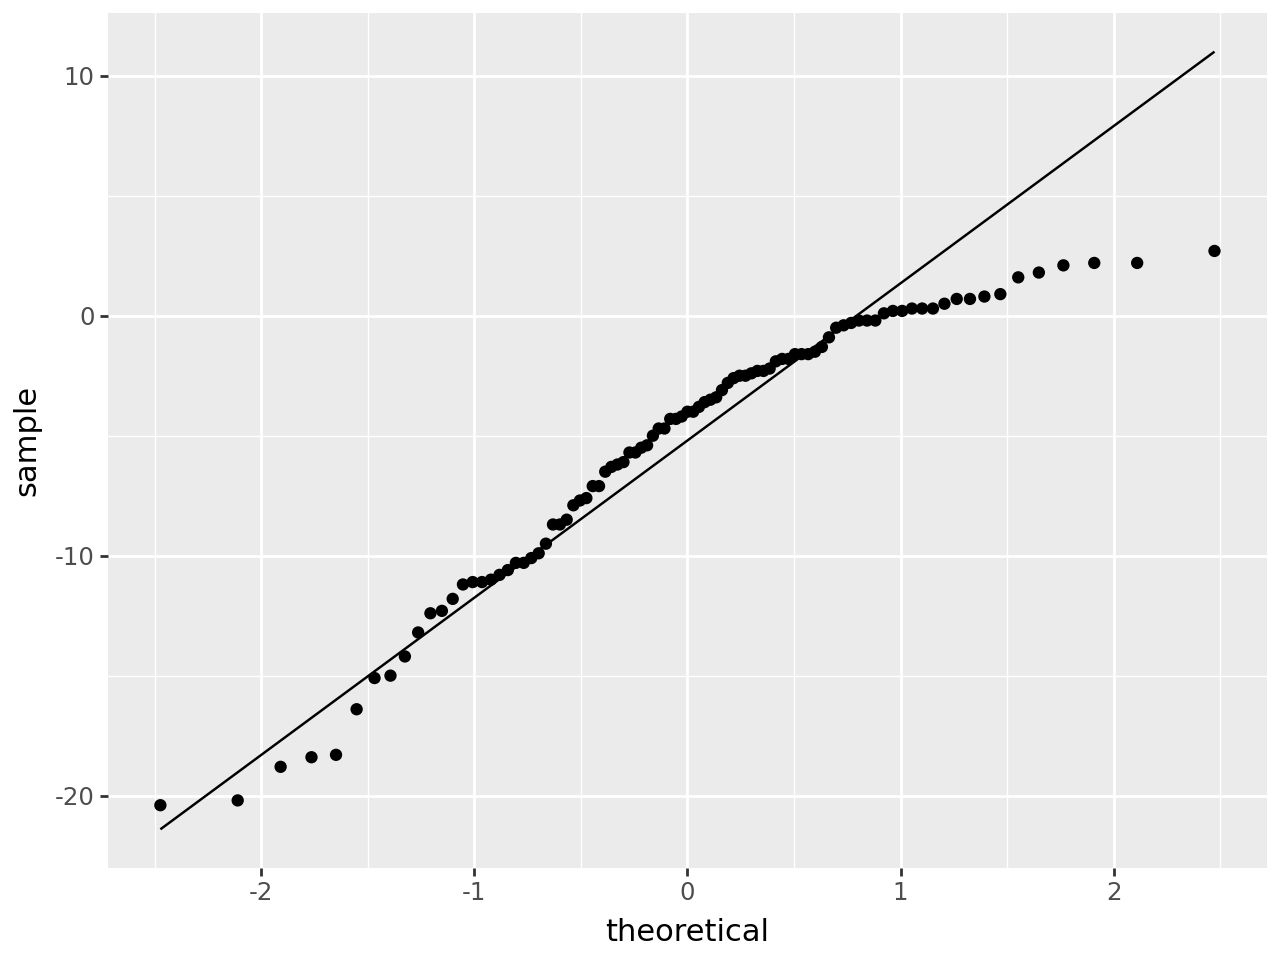

In [31]:
trials_qq = (ggplot(trials, aes(sample = 'BPChange')) +
            stat_qq() +
            stat_qq_line())

trials_qq.show()

In [32]:
stat, p = scipy.stats.shapiro(trials['BPChange'])
AD_trials = scipy.stats.anderson(trials['BPChange'])
print(f"The test statistic is {stat:.4f} and the p-value is {p:.4f}")
print(f"The AD test statistic is {AD_trials.statistic:.4f}. The critical values are {AD_trials.critical_values}. The significance level is {AD_trials.significance_level}")

The test statistic is 0.9287 and the p-value is 0.0001
The AD test statistic is 1.9282. The critical values are [0.554 0.631 0.757 0.883 1.05 ]. The significance level is [15.  10.   5.   2.5  1. ]


In [8]:
new_drug = trials[trials['Treatment'] == 'New Drug']
placebo = trials[trials['Treatment'] == 'Placebo']
approved_drug = trials[trials['Treatment'] == 'Approved Drug']

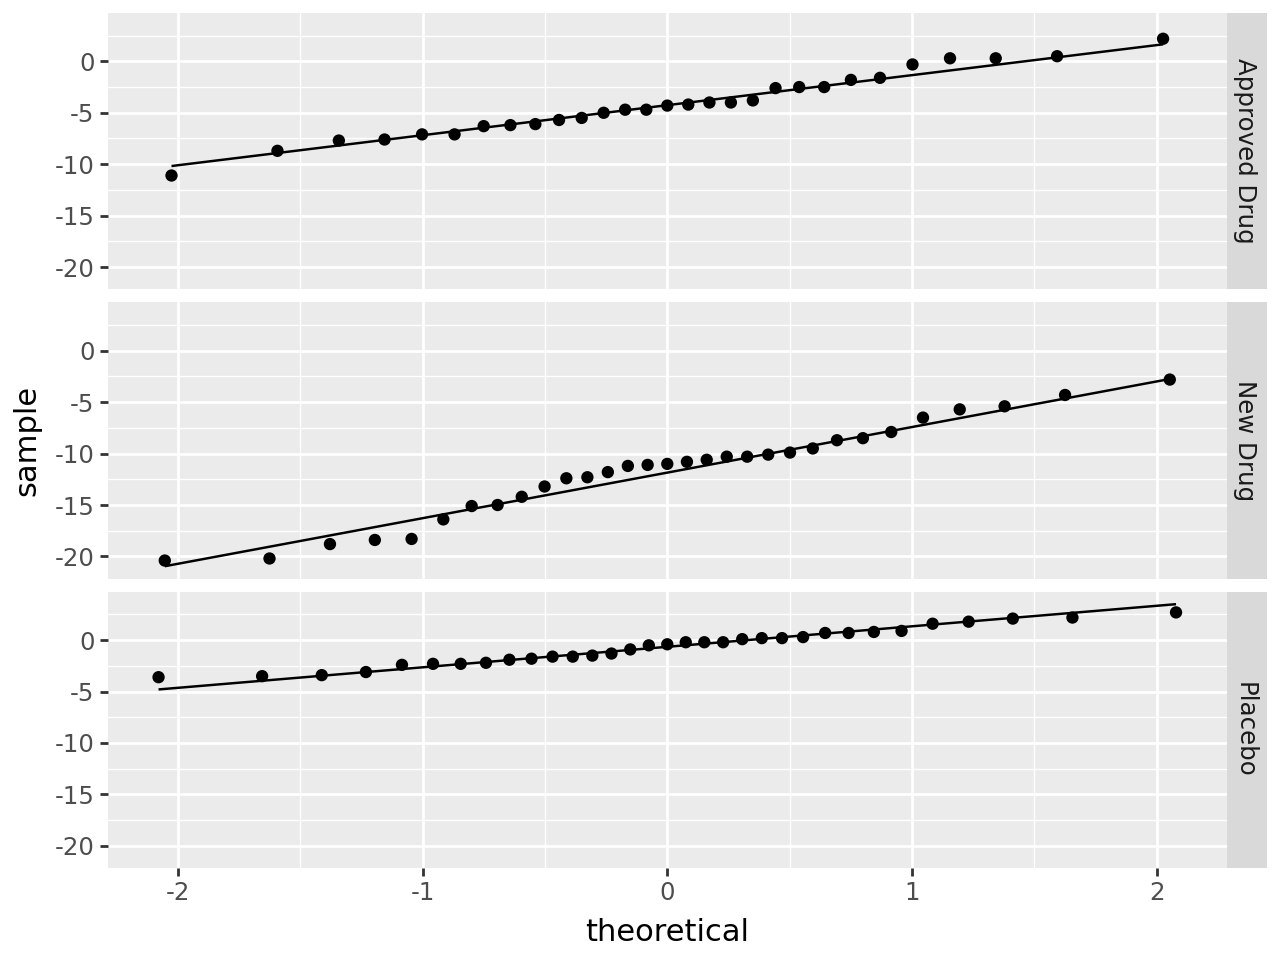

"bottles_qq_line = (ggplot(bottles, aes(sample = 'Units')) +\n            facet_grid(cols='Line') +\n            stat_qq() +\n            stat_qq_line())\n\nbottles_qq_line.show()"

In [ ]:
trials_qq = (ggplot(trials, aes(sample=trials['BPChange'])) +
             facet_grid('Treatment') +
             stat_qq() +
             stat_qq_line()
             )

trials_qq.show() 

In [38]:
stat_new, p_new = scipy.stats.shapiro(new_drug['BPChange'])
stat_placebo, p_placebo = scipy.stats.shapiro(placebo['BPChange'])
stat_approved, p_approved = scipy.stats.shapiro(approved_drug['BPChange'])

print(f"the p-value for the new drug is {p_new:.4f}. The p-value for the placebo is {p_placebo:.4f}. The p-value for the approved drug is {p_approved:.4f}")

the p-value for the new drug is 0.4557. The p-value for the placebo is 0.5008. The p-value for the approved drug is 0.9374


Answer: Yes, the data is normally distributed for each treatment

### Question 3b
Perform Levene test to check the assumption of equal variance (homoscedasticity). What is your p-value? (round to 4 decimal places)

In [9]:
stat, p = scipy.stats.levene(new_drug['BPChange'], placebo['BPChange'], approved_drug['BPChange'])

print(f"The test statistic is {stat:.4f}. The p-value is {p:.4f}")

The test statistic is 7.4146. The p-value is 0.0010


### Question 3c
Is the equal variance assumption satisfied?

Answer: No

### Question 3d
Based on the assumptions above, what is the most appropriate test to compare the change in blood pressure (BPChange) for the new drug and the existing treatment (Treatment = Approved Drug) vs the placebo?

Answer: Welch's ANOVA